In [4]:
# import the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
# fetch the data into input features X and target y
X = mnist.data
y = mnist.target.astype(int)

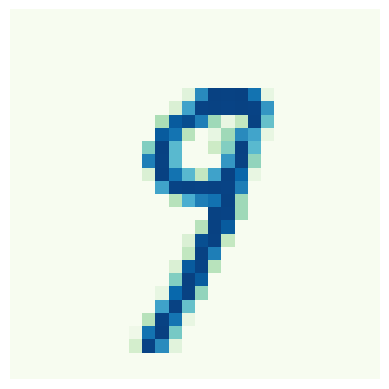

In [6]:
import matplotlib.pyplot as plt

def print_image(index):
   # get the desired data and reshape in the correct form
   example = X.loc[index].values
   """
   df.loc[:, 'A']   # selects all rows of column 'A'
   df.loc[0, :]     # selects row 0 of all columns
   df.loc[:, :]     # selects all rows and all columns
   """
   example = example.reshape(28,28)
   # plot the image
   plt.imshow(example, cmap='GnBu')
   plt.axis('off')
# print an example image
print_image(43)


In [7]:
# divide into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# create an instance of the classifier
knn_default = KNeighborsClassifier()
# fit the model and perform cross validation
knn_default = KNeighborsClassifier()
cv_scores = cross_val_score(knn_default, X_train, y_train, cv=5, scoring="accuracy")
# take the average of the scores of different folds
final_score_default = np.mean(cv_scores)
print("Accuracy with default KNN:", final_score_default)

Accuracy with defaul KNN: 0.9686666666666666


In [11]:
parameters = {'n_neighbors':list(range(4,7)), 'weights': ['uniform', 'distance']}

In [12]:
from sklearn.model_selection import GridSearchCV
# create an instance of the knn classifier
knn_grid_tuned = KNeighborsClassifier()
# create an instance of grid search with the above parameters
grid_search = GridSearchCV(knn_grid_tuned, parameters, cv=2, scoring='accuracy', return_train_score=True, verbose=10)
# fit the grid search with training set
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2; 1/6] START n_neighbors=4, weights=uniform..............................
[CV 1/2; 1/6] END n_neighbors=4, weights=uniform;, score=(train=0.976, test=0.964) total time=   6.3s
[CV 2/2; 1/6] START n_neighbors=4, weights=uniform..............................
[CV 2/2; 1/6] END n_neighbors=4, weights=uniform;, score=(train=0.979, test=0.962) total time=   7.1s
[CV 1/2; 2/6] START n_neighbors=4, weights=distance.............................
[CV 1/2; 2/6] END n_neighbors=4, weights=distance;, score=(train=1.000, test=0.967) total time=   7.9s
[CV 2/2; 2/6] START n_neighbors=4, weights=distance.............................
[CV 2/2; 2/6] END n_neighbors=4, weights=distance;, score=(train=1.000, test=0.966) total time=   7.5s
[CV 1/2; 3/6] START n_neighbors=5, weights=uniform..............................
[CV 1/2; 3/6] END n_neighbors=5, weights=uniform;, score=(train=0.975, test=0.964) total time=   8.1s
[CV 2/2; 3/6] START n_n

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [13]:
# retrieve the best estimator
knn_tuned = grid_search.best_estimator_

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_tuned.predict(X_test))



knn_tuned.predict()

0.9719428571428571